In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from PIL import ImageFilter
from PIL import ImageChops
from PIL import ImageOps
from PIL import ImageEnhance
from PIL import ImageStat as stat

(424, 519) RGB


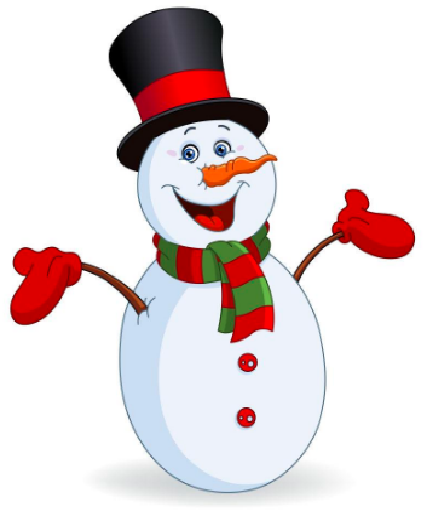

In [7]:
im = Image.open('balwan.png')
print(im.size, im.mode)
im

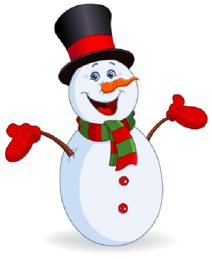

In [4]:
w,h = im.size
s_w = 0.5 # skala zmiany rozmiaru w 
s_h = 0.5 # skala zmiany rozmiaru h
im1 = im.resize((int(w*s_w), int(h*s_h)))
# im1.save("balwan1.png")
im1

#  Image.NEAREST (0), Image.LANCZOS (1), Image.BILINEAR (2), Image.BICUBIC (3), Image.BOX (4) or Image.HAMMING (5)

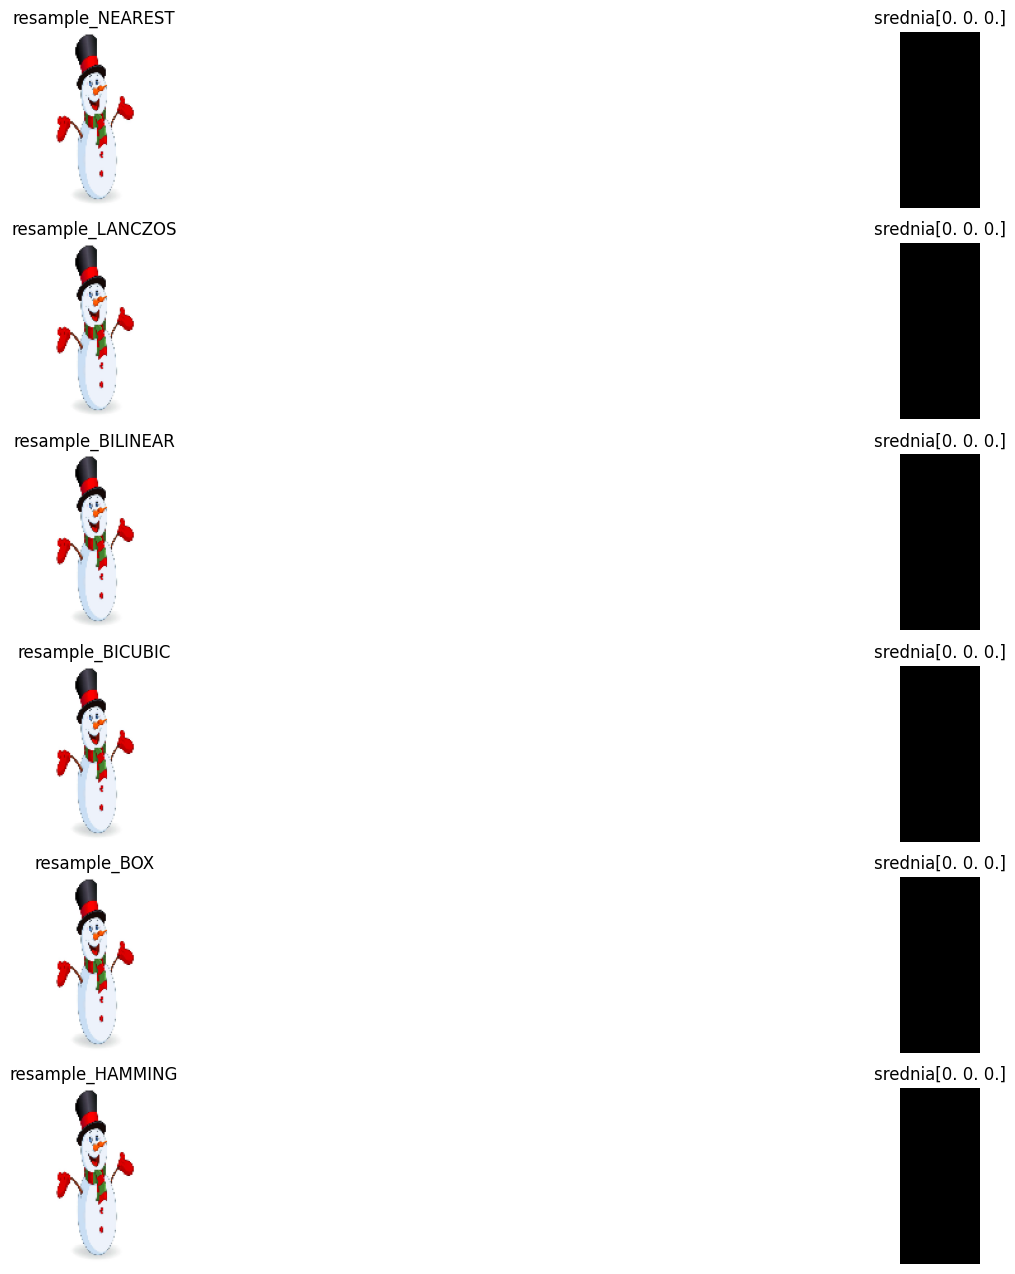

In [18]:
s_w = 0.15
s_h = 0.27
resample_method =['NEAREST','LANCZOS','BILINEAR','BICUBIC','BOX','HAMMING']
im_N = im.resize((int(w*s_w), int(h*s_h)), 0)
plt.figure(figsize=(20, 16))
i=1
for t in range(6):
    file_name = "resample_"+ str(resample_method[t])
    im_Nb = im_N.resize((int(w*s_w), int(h*s_h)), t)
    plt.subplot(6, 2, i)
    plt.title(str(file_name))
    plt.imshow(im_Nb)
    plt.axis('off')
    i +=1
    im_skalowany = im.resize(im_Nb.size, 0)
    diff = ImageChops.difference(im_Nb, im_skalowany)
    s = stat.Stat(diff)
    plt.subplot(6, 2, i)
    plt.title('srednia' + str(np.round(s.mean, 2)))
    plt.imshow(diff)
    plt.axis('off')
    i +=1

# wycinanie z jednoczesną zmianą rozmiaru wycinka

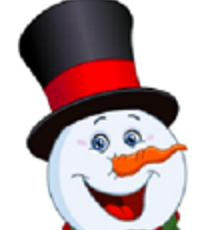

In [8]:
w_p = 45
h_p=5
w_k=150
h_k=120
wycinek = (w_p, h_p, w_k, h_k) # definicja miejsca wycięcia w_p, h_p - lewy górny róg, w_k,h_k prawy dolny róg
wyc_w = wycinek[2] - wycinek[0] # szerokość wycinka
wyc_h = wycinek[3] - wycinek[1] # wysokość wycinka
s_w = 2 # skala dla szerokości
s_h = 2 # skala dla wysokości
glowa = im1.resize((s_w * wyc_w, s_h * wyc_h) , box = wycinek)# wycina wycienek i zmienia rozmiar wycinka
glowa

In [10]:
# wycinanie fragmentu obrazu - crop(box), gdzie box jest czwórka liczb (patrz wycinek wyżej)

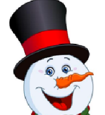

In [9]:
glowa1 = im1.crop(wycinek)
glowa1


# image.rotate(angle, resample=0, expand=0, center=None, translate=None, fillcolor=None)

In [ ]:
# image.rotate(angle, resample=0, expand=0, center=None, translate=None, fillcolor=None)
# angle: It is the angle in degrees counterclockwise.
# resample: It is an optional input. It can be one of PIL.Image.NEAREST (use the nearest neighbor), PIL.Image.BILINEAR (linear interpolation in a 2×2 environment), or PIL.Image.BICUBIC (cubic spline interpolation in a 4×4 environment). If omitted, or if the image has mode “1” or “P,” it is set PIL.Image.NEAREST. See Filters.
# expand: It is an optional input. If set to True, the images expand and become large enough to hold the entire rotated image. If set to False, the output image is of the same size as of input image.
# center: It is an optional input. It set the center of image rotation. By default, it is the center of the image.
# translate: It is an optional input. It is a post-rotate translation.
# fillcolor: It is an optional input. It is a color for an area outside the rotated image.

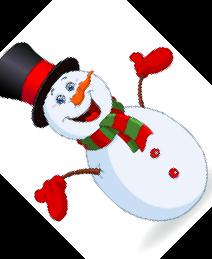

In [11]:
rot_45 = im1.rotate(45) # obrót o 45 stopni w lewo
rot_315 = im1.rotate(315) # obrót o 45 stopni w prawo = # obrót o 315 stopni w lewo
rot_45

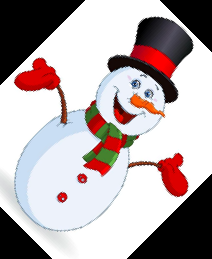

In [12]:
rot_315

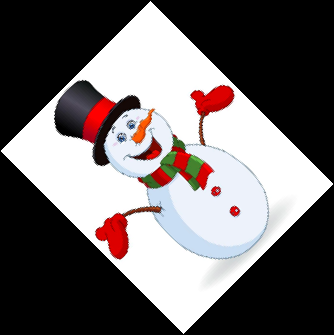

In [14]:
rot_45_exp = im1.rotate(45, expand=1) # obrót o 45 stopni w lewo, rozszerzony (expand = 1) tek, zeby po obrocie widac było cały obraz
rot_45_exp

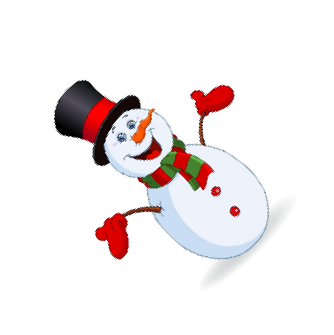

In [15]:
rot_45_exp_fill = im1.rotate(45, expand=1, fillcolor=(255,255,255)) # obrót o 45 stopni w lewo, rozszerzony (expand = 1) tek, zeby po obrocie widac było cały obraz
# dodatkowe obszary, które musza powstac po obrocie zostały wypełnione kolorem białym
rot_45_exp_fill

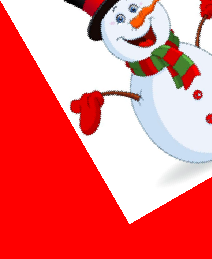

In [16]:
# obrót wokół punktu center domyslnie jest to obrót wokół srodka obrazu
rot_center = im1.rotate(30, expand=0, fillcolor=(255,0,0), center=(0,0)) # expand nie działa dobrze, gdy center nie jest środkiem obrazu
rot_center


# inne przekształcenia geometryczne
# im.transpose(Image.FLIP_LEFT_RIGHT)
# im.transpose(Image.FLIP_TOP_BOTTOM)
# im.transpose(Image.TRANSPOSE)
# im.transpose(Image.TRANSVERSE)

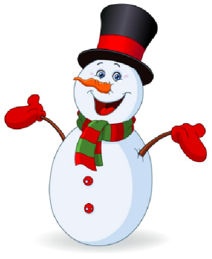

In [17]:
t1 = im1.transpose(Image.FLIP_LEFT_RIGHT)
t1


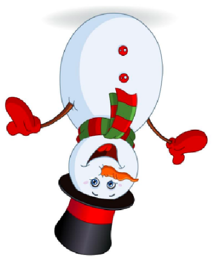

In [18]:
t2 = im1.transpose(Image.FLIP_TOP_BOTTOM)
t2




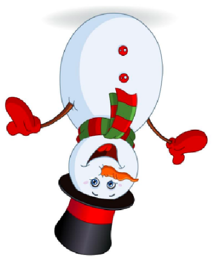

In [19]:
o1 = im1.rotate(180)
t2_1 = o1.transpose(Image.FLIP_LEFT_RIGHT)
t2_1

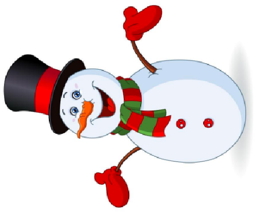

In [20]:
t3 = im1.transpose(Image.TRANSPOSE)
t3



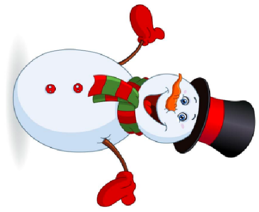

In [21]:
im1.transpose(Image.TRANSVERSE)